In [1]:
# Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn

import quandl
from config1 import quandl_api_key

from datetime import datetime
from datetime import date
from datetime import timedelta
from scipy.stats import linregress
from scipy.stats import zscore
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
training_df = pd.read_csv("quandl_data/training_data_gary.csv")

training_master_df = training_df.reset_index().copy()
training_master_df = training_master_df.drop(columns=['Unnamed: 0', 'index'])
training_master_df

,RSI,12WMA%12EMA,12WMA%26EMA,12EMA%26EMA,50SMA%100SMA,50SMA%200SMA,100SMA%200SMA,SP500%12WMA,SP500%12EMA,SP500%26EMA,...,SP500%3Upper,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal
0,54.352587,-0.060032,-0.154354,-0.094378,2.186754,8.701384,6.375220,1.202574,1.141820,1.046364,...,-1.887951,-0.823519,1.376173,3.675653,4.864961,-23.666667,0.035087,3.102837,4,1
1,58.187874,-0.077940,0.012994,0.091006,2.072484,8.619947,6.414524,1.968529,1.889054,1.981779,...,-1.314983,-0.131021,2.324225,4.903236,6.242116,-35.250000,0.035004,1.468976,3,1
2,62.042890,-0.055834,0.276386,0.332406,1.978627,8.535501,6.429655,2.682801,2.625469,2.966602,...,-0.969337,0.429224,3.348297,6.442141,8.059582,-46.333333,0.038370,1.386482,3,1
3,61.378060,0.011647,0.517886,0.506180,1.881923,8.439804,6.436746,2.088734,2.100624,2.617437,...,-1.726144,-0.194098,3.017911,6.443535,8.243226,-19.857143,0.041260,1.084599,3,1
4,63.748642,0.113890,0.810422,0.695739,1.815670,8.388002,6.455128,2.287572,2.404067,3.116532,...,-1.765028,-0.056179,3.546305,7.418204,9.464808,-27.600000,0.043665,1.550388,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4273,35.813684,-1.078154,-3.397296,-2.344418,0.504575,-1.459228,-1.953944,-0.678902,-1.749736,-4.053133,...,-14.212109,-11.089733,-4.109589,4.059920,8.689910,2.000000,-0.000090,3.276047,4,1
4274,41.122855,-0.996950,-3.180633,-2.205672,0.339839,-1.581966,-1.915296,0.672600,-0.331056,-2.529426,...,-12.330991,-9.250081,-2.389524,5.593159,10.094999,1.956897,-0.011318,0.066216,2,1
4275,38.368709,-0.900782,-3.040674,-2.159342,0.209062,-1.694122,-1.899213,-0.311812,-1.209786,-3.343005,...,-12.545034,-9.585839,-3.023063,4.567009,8.825727,1.940678,-0.018775,1.754151,4,1
4276,39.524847,-0.812140,-2.871083,-2.075802,0.102497,-1.779588,-1.880158,0.033903,-0.778512,-2.838154,...,-10.936613,-8.216527,-2.245483,4.556523,8.325296,1.957265,-0.021283,1.415220,3,1


In [3]:
testing_df = pd.read_csv("quandl_data/testing_data_gary.csv")

testing_master_df = testing_df.reset_index().copy()
testing_master_df = testing_master_df.drop(columns=['Unnamed: 0', 'index'])
testing_master_df

,RSI,12WMA%12EMA,12WMA%26EMA,12EMA%26EMA,50SMA%100SMA,50SMA%200SMA,100SMA%200SMA,SP500%12WMA,SP500%12EMA,SP500%26EMA,...,SP500%3Upper,SP500%2Upper,SP500%Middle20Day,SP500%2Lower,SP500%3Lower,Div/10Yr-2Yr,SP500_corr_6Mo-3Mo_%_Ret,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal
0,48.999394,-0.585271,-2.097103,-1.520732,-0.123313,-1.930956,-1.809875,1.954893,1.358181,-0.183205,...,-5.876570,-3.690470,1.001215,6.173415,8.963384,1.922414,0.013104,-4.147166,1,0
1,43.665813,-0.449215,-1.886983,-1.444256,-0.285036,-2.068452,-1.788514,0.082189,-0.367394,-1.806344,...,-6.445029,-4.540597,-0.489257,3.921206,6.276368,2.026786,0.008821,-2.620434,1,0
2,45.679116,-0.310608,-1.629303,-1.322804,-0.438046,-2.194087,-1.763768,0.480941,0.168840,-1.156198,...,-4.428231,-2.885430,0.354589,3.818262,5.641333,1.939655,0.008687,-3.263587,1,0
3,45.556788,-0.189179,-1.402597,-1.215717,-0.595790,-2.329759,-1.744362,0.299126,0.109381,-1.107666,...,-3.224295,-2.005452,0.526720,3.193225,4.580238,1.923077,0.004653,-4.397051,1,0
4,40.495887,-0.087780,-1.341337,-1.254659,-0.768392,-2.482884,-1.727767,-1.273857,-1.360519,-2.598108,...,-4.577113,-3.426249,-1.039181,1.468882,2.771199,2.044643,-0.001579,-0.924190,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,55.993296,0.064269,1.066777,1.001865,4.167560,-0.194799,-4.187829,0.658853,0.723545,1.732659,...,-2.967673,-1.517002,1.518480,4.747035,6.439565,4.108696,0.132902,1.693020,3,1
1094,59.232743,0.142902,1.223965,1.079520,4.403034,-0.071438,-4.285768,1.469796,1.614798,2.711750,...,-2.001159,-0.564407,2.439300,5.630130,7.301266,3.795918,0.130872,1.128650,3,1
1095,55.655377,0.242383,1.295736,1.050806,4.662204,0.065131,-4.392296,0.308334,0.551464,1.608065,...,-2.931672,-1.566373,1.282781,4.301788,5.879805,3.916667,0.132578,3.091633,4,1
1096,58.803720,0.316144,1.425876,1.106235,4.982758,0.271609,-4.487546,1.099236,1.418855,2.540786,...,-2.202802,-0.766048,2.237940,5.429478,7.101153,3.795918,0.120463,2.135372,4,1


# Data Loading and Machine Learning

### Multiple Linear Regression 

In [4]:
# Assigning data to X and y

# Training Data
X_train = training_master_df[['RSI',
                              '12WMA%12EMA',
#                               '12WMA%26EMA',
                              '12EMA%26EMA',
                              '50SMA%100SMA',
                              '50SMA%200SMA',
                              '100SMA%200SMA',
#                               'SP500%12WMA',
#                               'SP500%12EMA',
#                               'SP500%26EMA',
#                               'SP500%50SMA',
#                               'SP500%100SMA',
#                               'SP500%200SMA',
                              'SP500%3Upper',
#                               'SP500%2Upper',
#                               'SP500%Middle20Day',
#                               'SP500%2Lower',
                              'SP500%3Lower',
#                               'Div/10Yr-2Yr',
                              'SP500_corr_6Mo-3Mo_%_Ret'
                             ]]

y_train = training_master_df['SP500_ret_signal'].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

testing_master_df.to_csv("quandl_data/testing_data_gary.csv", encoding='utf-8')

# Testing Data
X_test = testing_master_df[['RSI',
                            '12WMA%12EMA',
#                             '12WMA%26EMA',
                            '12EMA%26EMA',
                            '50SMA%100SMA',
                            '50SMA%200SMA',
                            '100SMA%200SMA',
#                             'SP500%12WMA',
#                             'SP500%12EMA',
#                             'SP500%26EMA',
#                             'SP500%50SMA',
#                             'SP500%100SMA',
#                             'SP500%200SMA',
                            'SP500%3Upper',
#                             'SP500%2Upper',
#                             'SP500%Middle20Day',
#                             'SP500%2Lower',
                            'SP500%3Lower',
#                             'Div/10Yr-2Yr',
                            'SP500_corr_6Mo-3Mo_%_Ret'
                            ]]

y_test = testing_master_df['SP500_ret_signal'].values.reshape(-1, 1)
print(X_test.shape, y_test.shape)

(4278, 9) (4278, 1)
(1098, 9) (1098, 1)


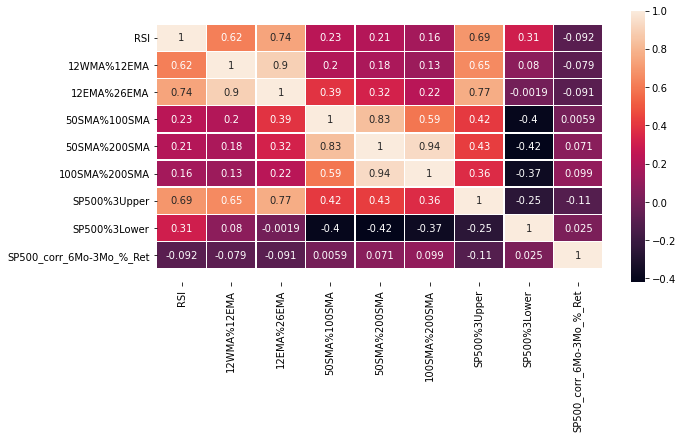

In [5]:
fig = plt.figure(figsize=(10, 5))
ax = sn.heatmap(X_train.corr(), annot=True, linewidth=0.5)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
ax.xaxis.set_label_position("top")
#fig.tight_layout()
plt.show()

In [6]:
X_train

,RSI,12WMA%12EMA,12EMA%26EMA,50SMA%100SMA,50SMA%200SMA,100SMA%200SMA,SP500%3Upper,SP500%3Lower,SP500_corr_6Mo-3Mo_%_Ret
0,54.352587,-0.060032,-0.094378,2.186754,8.701384,6.375220,-1.887951,4.864961,0.035087
1,58.187874,-0.077940,0.091006,2.072484,8.619947,6.414524,-1.314983,6.242116,0.035004
2,62.042890,-0.055834,0.332406,1.978627,8.535501,6.429655,-0.969337,8.059582,0.038370
3,61.378060,0.011647,0.506180,1.881923,8.439804,6.436746,-1.726144,8.243226,0.041260
4,63.748642,0.113890,0.695739,1.815670,8.388002,6.455128,-1.765028,9.464808,0.043665
...,...,...,...,...,...,...,...,...,...
4273,35.813684,-1.078154,-2.344418,0.504575,-1.459228,-1.953944,-14.212109,8.689910,-0.000090
4274,41.122855,-0.996950,-2.205672,0.339839,-1.581966,-1.915296,-12.330991,10.094999,-0.011318
4275,38.368709,-0.900782,-2.159342,0.209062,-1.694122,-1.899213,-12.545034,8.825727,-0.018775
4276,39.524847,-0.812140,-2.075802,0.102497,-1.779588,-1.880158,-10.936613,8.325296,-0.021283


In [7]:
y_train

array([[4],
       [3],
       [3],
       ...,
       [4],
       [3],
       [1]], dtype=int64)

In [8]:
X_test

,RSI,12WMA%12EMA,12EMA%26EMA,50SMA%100SMA,50SMA%200SMA,100SMA%200SMA,SP500%3Upper,SP500%3Lower,SP500_corr_6Mo-3Mo_%_Ret
0,48.999394,-0.585271,-1.520732,-0.123313,-1.930956,-1.809875,-5.876570,8.963384,0.013104
1,43.665813,-0.449215,-1.444256,-0.285036,-2.068452,-1.788514,-6.445029,6.276368,0.008821
2,45.679116,-0.310608,-1.322804,-0.438046,-2.194087,-1.763768,-4.428231,5.641333,0.008687
3,45.556788,-0.189179,-1.215717,-0.595790,-2.329759,-1.744362,-3.224295,4.580238,0.004653
4,40.495887,-0.087780,-1.254659,-0.768392,-2.482884,-1.727767,-4.577113,2.771199,-0.001579
...,...,...,...,...,...,...,...,...,...
1093,55.993296,0.064269,1.001865,4.167560,-0.194799,-4.187829,-2.967673,6.439565,0.132902
1094,59.232743,0.142902,1.079520,4.403034,-0.071438,-4.285768,-2.001159,7.301266,0.130872
1095,55.655377,0.242383,1.050806,4.662204,0.065131,-4.392296,-2.931672,5.879805,0.132578
1096,58.803720,0.316144,1.106235,4.982758,0.271609,-4.487546,-2.202802,7.101153,0.120463


In [9]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [4],
       [4],
       [3]], dtype=int64)

In [10]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.020894676488787733
Testing Score: -0.07526687791846443


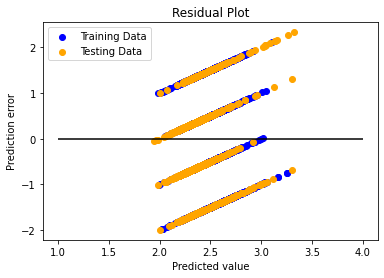

In [12]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot")
plt.xlabel("Predicted value")
plt.ylabel("Prediction error")
plt.show()
### END SOLUTION

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [14]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: -7.517901060069578
Testing Score: -7.420591973534986


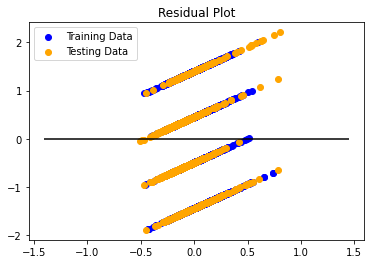

In [16]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

### KNN

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_scaler = StandardScaler().fit(X_train)

In [18]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.362
k: 3, Train/Test Score: 0.789/0.329
k: 5, Train/Test Score: 0.712/0.353
k: 7, Train/Test Score: 0.657/0.379
k: 9, Train/Test Score: 0.613/0.368
k: 11, Train/Test Score: 0.581/0.379
k: 13, Train/Test Score: 0.550/0.372
k: 15, Train/Test Score: 0.530/0.387
k: 17, Train/Test Score: 0.516/0.396
k: 19, Train/Test Score: 0.506/0.393
k: 21, Train/Test Score: 0.500/0.399
k: 23, Train/Test Score: 0.486/0.392
k: 25, Train/Test Score: 0.479/0.400
k: 27, Train/Test Score: 0.471/0.402
k: 29, Train/Test Score: 0.472/0.405
k: 31, Train/Test Score: 0.463/0.399
k: 33, Train/Test Score: 0.461/0.414
k: 35, Train/Test Score: 0.452/0.395
k: 37, Train/Test Score: 0.446/0.394
k: 39, Train/Test Score: 0.440/0.401
k: 41, Train/Test Score: 0.432/0.394
k: 43, Train/Test Score: 0.427/0.391
k: 45, Train/Test Score: 0.426/0.395
k: 47, Train/Test Score: 0.426/0.388
k: 49, Train/Test Score: 0.422/0.389
k: 51, Train/Test Score: 0.418/0.390
k: 53, Train/Test Score: 0.420/0.387


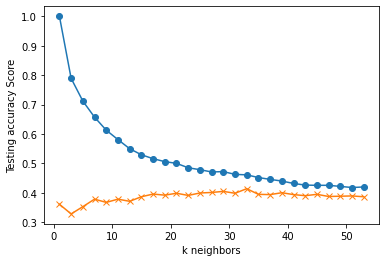

In [19]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 55, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train.ravel())
    test_score = knn.score(X_test_scaled, y_test.ravel())
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 55, 2), train_scores, marker='o')
plt.plot(range(1, 55, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train_scaled, y_train.ravel())
print('k=33 Test Acc: %.3f' % knn.score(X_test_scaled, y_test.ravel()))

k=33 Test Acc: 0.414


In [21]:
#retrain model using optimal
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train_scaled, y_train.ravel())
pred = knn.predict(X_test_scaled)

              precision    recall  f1-score   support

           1       0.19      0.17      0.18       128
           2       0.42      0.55      0.48       382
           3       0.46      0.41      0.43       403
           4       0.48      0.31      0.38       185

    accuracy                           0.41      1098
   macro avg       0.39      0.36      0.37      1098
weighted avg       0.42      0.41      0.41      1098



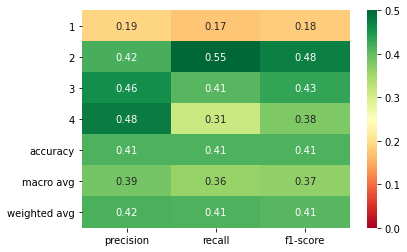

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(classification_report(y_test, pred))

clf_report = classification_report(y_test, pred, output_dict=True)
clf_report

sn.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, vmin=0, vmax=0.5, cmap="RdYlGn", annot=True)

# plot_confusion_matrix(clf_report, X_test, y_test)
# plot_confusion_matrix(KNeighborsClassifier, X_test_scaled, X_test_scaled, cmap=plt.cm.Blues, display_labels=["purple", "yellow"])

plt.show()

### Random Forest

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train.ravel())
clf.score(X_test, y_test.ravel())

0.3570127504553734

In [24]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train.ravel())
rf.score(X_test_scaled, y_test.ravel())

0.3806921675774135

In [25]:
feature_names = X_train.columns

In [26]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.11706333787662783, '50SMA%100SMA'),
 (0.11624401796686488, '100SMA%200SMA'),
 (0.11502286675540825, 'SP500_corr_6Mo-3Mo_%_Ret'),
 (0.11265104843432644, '50SMA%200SMA'),
 (0.11162241055307486, 'RSI'),
 (0.11054328418817617, 'SP500%3Upper'),
 (0.10987117889459593, '12EMA%26EMA'),
 (0.1037400381465475, 'SP500%3Lower'),
 (0.10324181718437797, '12WMA%12EMA')]

### From KNN: Calculating the Predicted 3's Positive Return Hit Percentage

In [27]:
pred = knn.predict(X_test_scaled)
pred

array([4, 1, 4, ..., 4, 3, 3], dtype=int64)

In [28]:
results_df = pd.concat([testing_master_df, pd.DataFrame({"Pred": pred})], axis=1)
results_df = results_df[["Fwd_SP500_%_Ret", "SP500_ret_signal", "SP500_pos_neg_ret_signal", "Pred"]]
results_df

,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal,Pred
0,-4.147166,1,0,4
1,-2.620434,1,0,1
2,-3.263587,1,0,4
3,-4.397051,1,0,1
4,-0.924190,2,0,4
...,...,...,...,...
1093,1.693020,3,1,4
1094,1.128650,3,1,3
1095,3.091633,4,1,4
1096,2.135372,4,1,3


In [29]:
results_df["Pred"].value_counts().sort_index()

1    116
2    502
3    359
4    121
Name: Pred, dtype: int64

In [30]:
final_results_df = results_df.loc[(results_df["Pred"] >= 4)]
final_results_df["Fwd_SP500_%_Ret"].mean()

0.5060088963455593

In [31]:
d = results_df["SP500_pos_neg_ret_signal"].value_counts().sort_index()
print(results_df["SP500_pos_neg_ret_signal"].value_counts()[0]/results_df["SP500_pos_neg_ret_signal"].count())
print(results_df["SP500_pos_neg_ret_signal"].value_counts()[1]/results_df["SP500_pos_neg_ret_signal"].count())
d

0.36429872495446264
0.6357012750455373


0    400
1    698
Name: SP500_pos_neg_ret_signal, dtype: int64

In [32]:
final_results_df = results_df.loc[(results_df["Pred"] >= 4)]
print(final_results_df.count())
# print(final_results_df.value_counts())
final_results_df2 = final_results_df.loc[(results_df["SP500_pos_neg_ret_signal"] == 1)].copy()
# final_results_df2["Fwd_SP500_%_Ret"].mean()
final_results_df
final_results_df2

Fwd_SP500_%_Ret             121
SP500_ret_signal            121
SP500_pos_neg_ret_signal    121
Pred                        121
dtype: int64


,Fwd_SP500_%_Ret,SP500_ret_signal,SP500_pos_neg_ret_signal,Pred
18,2.702353,4,1,4
19,3.632340,4,1,4
31,0.173504,2,1,4
501,1.809651,4,1,4
503,1.085532,3,1,4
...,...,...,...,...
1074,3.283881,4,1,4
1083,1.768674,4,1,4
1084,1.895115,4,1,4
1093,1.693020,3,1,4


In [33]:
# final_results_df = results_df.loc[(results_df["Pred"] >= 2)]
# print(final_results_df.count())
# print(final_results_df.value_counts())
final_results_df2 = results_df.loc[(results_df["SP500_pos_neg_ret_signal"] == 1)]
final_results_df2["Fwd_SP500_%_Ret"].mean()

1.4059522919738925

In [34]:
list(final_results_df)

['Fwd_SP500_%_Ret', 'SP500_ret_signal', 'SP500_pos_neg_ret_signal', 'Pred']